In [138]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import seaborn as sns
from pandas.tools.plotting import radviz, scatter_matrix
import collections
%matplotlib inline
# coding: latin-1

In [99]:
# https://www.data.gouv.fr/fr/datasets/honoraires-des-professionnels-de-sante-liberaux/
path = "Honoraires_totaux_des_professionnels_de_sante_par_departement_en_2013.xls"

data = pd.read_excel(path, sheetname=[1, 2, 3, 4, 5, 6])

df = data[2]

# enlever les nan
df = df.replace('nc', np.nan).dropna()

# extraire les codes numeriques
df = df[df['DEPARTEMENT'].str.contains('- ')]
df = df[df['SPECIALISTES'].str.contains('- ')]

dep = pd.DataFrame([[x] + x.split('- ') for x in df['DEPARTEMENT']],
                       columns=['DEPARTEMENT', 'num_dep', 'name_dep'])

spec = pd.DataFrame([[x] + x.split('- ') for x in df['SPECIALISTES']],
                        columns=['SPECIALISTES', 'num_spec', 'name_spec'])

df = pd.concat([df, dep, spec], axis=1, join='inner')

# ne garder que les lignes avec EFFECTIF > 0
df = df[df['EFFECTIFS'] > 0]


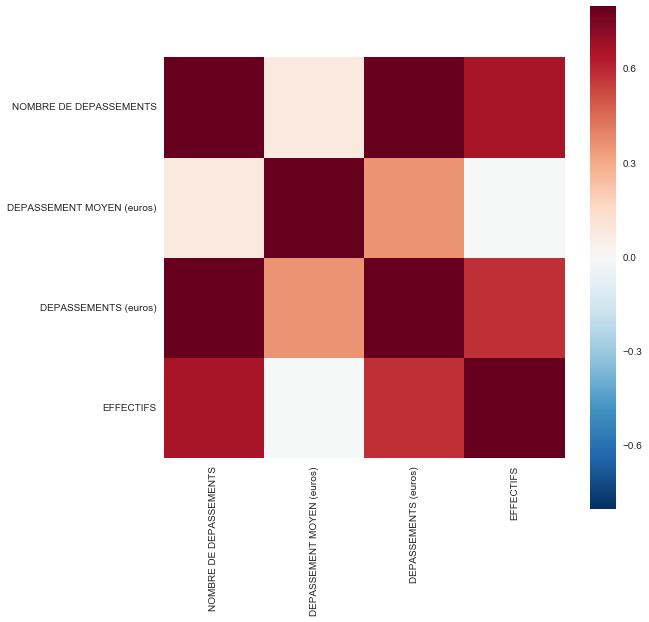

In [100]:
dat = df[['num_spec', 'NOMBRE DE DEPASSEMENTS',
              'DEPASSEMENT MOYEN (euros)', 'DEPASSEMENTS (euros)', 'EFFECTIFS']]
corr_mat = dat.corr()

plt.figure(figsize=(9,9))
sns.heatmap(corr_mat, square=True, vmax=0.8)

In [217]:

print '########################## DEPASSEMENT PAR SPECIALITE #####################################'
print ''
grouped_by_spec = df[['name_spec', 'DEPASSEMENT MOYEN (euros)']].groupby(['name_spec']).mean()
grouped_by_spec = grouped_by_spec.sort_values('DEPASSEMENT MOYEN (euros)',ascending=False)
print grouped_by_spec.head(15)
print ''
print '############################DEPASSEMENT PAR DEP ##################################'
print ''
grouped_by_dep = df[['num_dep', 'DEPASSEMENT MOYEN (euros)']].groupby(['num_dep']).mean()
grouped_by_dep = grouped_by_dep.sort_values('DEPASSEMENT MOYEN (euros)',ascending=False)
print grouped_by_dep.head(15)
print ''
print '##################################################################################'


########################## DEPASSEMENT PAR SPECIALITE #####################################

                                                 DEPASSEMENT MOYEN (euros)
name_spec                                                                 
Médecine nucléaire                                              371.000000
Gynécologie obstétrique                                         166.500000
Ophtalmologie                                                   157.500000
Chirurgie orthopédique et traumatologie                         151.545455
Radiodiagnostic et imagerie médicale                            114.285714
Gynécologie médicale                                            107.600000
Chirurgie urologique                                             91.500000
Oncologie radiothérapique                                        82.000000
Obstétrique                                                      74.257143
Gynécologie obstétrique et gynécologie médicale                  66.916667
Chirurg

In [216]:
#Fichier Densité

#!/usr/bin/env python
#-*- coding: utf-8 -*-

path = "densite2014.csv"
df_densite = pd.read_csv(path,encoding='latin-1', skiprows=[0, 1, 2, 3, 5])
df_densite = df_densite[df_densite['SPECIALITE'].str.contains('- ')]

noms = list(df_densite.columns.values)


print '###################### DENSITE PAR DEP ##################################################'
print ''
df_densite_dep = df_densite[['SPECIALITE',noms[1]]].sort_values(noms[1],ascending=False)
print df_densite_dep.head(15)
print '##################### DENSITE PAR SPECIALITE ############################################'
print ''
df_densite_specialite = df_densite.mean()[2:]
print df_densite_specialite.sort_values().head(15)
print '##################################################################################'
print ''

###################### DENSITE PAR DEP ##################################################

                    SPECIALITE  Ensemble des spécialités d'exercice
96                  75 - Paris                                799.3
26        06 - Alpes-Maritimes                                453.6
33       13 - Bouches-du-Rhône                                446.5
55                34 - Hérault                                439.4
90                  69 - Rhône                                438.4
52          31 - Haute-Garonne                                424.8
54                33 - Gironde                                418.7
25           05 - Hautes-Alpes                                407.3
108          87 - Haute-Vienne                                406.9
75     54 - Meurthe-et-Moselle                                405.5
113        92 - Hauts-de-Seine                                405.5
88               67 - Bas-Rhin                                393.6
115          94 - Val-de-